<h1 align='center'> Monthly Car Sales Forecasting<h1>

## Table of Contetns

**1. Data Import**

**2. Data Exploration**

**3. Modeling - 1. SARIMA**

**4. Modeling - 2. Machine Learning - Random Forest**

In [1]:
import warnings
warnings.filterwarnings("ignore")

# data wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette('Paired', 10)

# tsa
import statsmodels.tsa.api as sm
from statsmodels.tsa.stattools import adfuller

import itertools

# ml
from sklearn.model_selection import train_test_split, TimeSeriesSplit

plt.style.use('seaborn-whitegrid')
%matplotlib inline

## 1. Data Import

In [2]:
ls

monthly-car-sales-in-quebec-1960.csv  monthly_car_sales.ipynb


In [3]:
df = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', parse_dates=['Month'], index_col=['Month'])

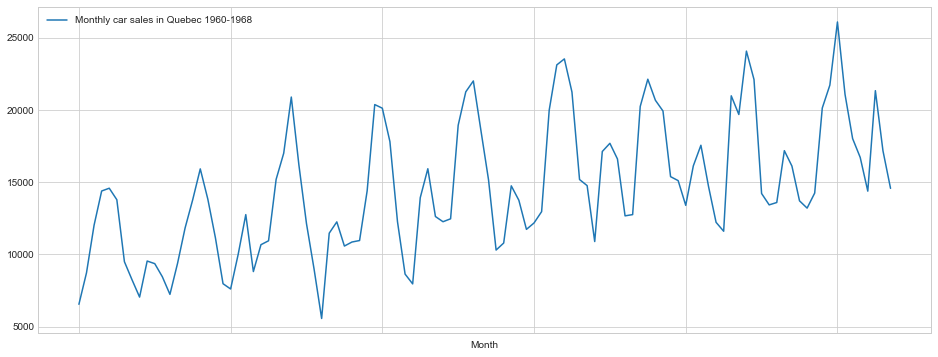

In [4]:
df.plot(figsize=(16,6))

## 2. Data Exploration

In [5]:
df.isnull().sum()

Monthly car sales in Quebec 1960-1968    1
dtype: int64

In [6]:
# Drop the last row
df = df.iloc[:-1, :]
df.index = pd.to_datetime(df.index)

In [7]:
# Rolling mean
moving_ave = df.rolling(window=12).mean()
moving_std = df.rolling(window=12).std()

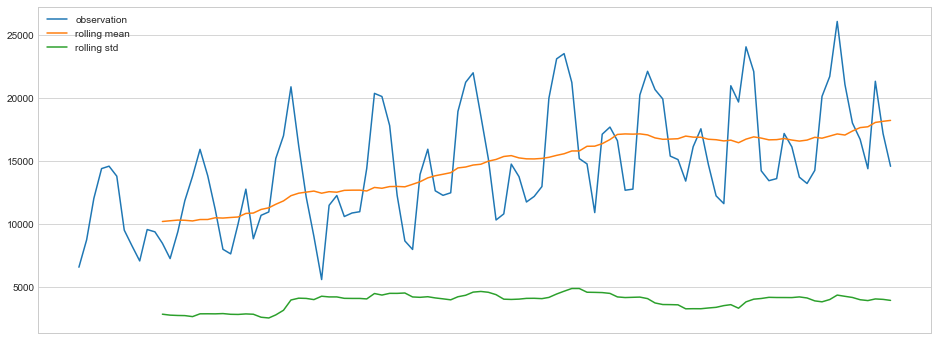

In [8]:
# See clear trend. Variance seems stationary over time.
plt.figure(figsize=(16,6))
plt.plot(df, label='observation')
plt.plot(moving_ave, label='rolling mean')
plt.plot(moving_std, label='rolling std')
plt.xticks([])
plt.legend()
plt.show()

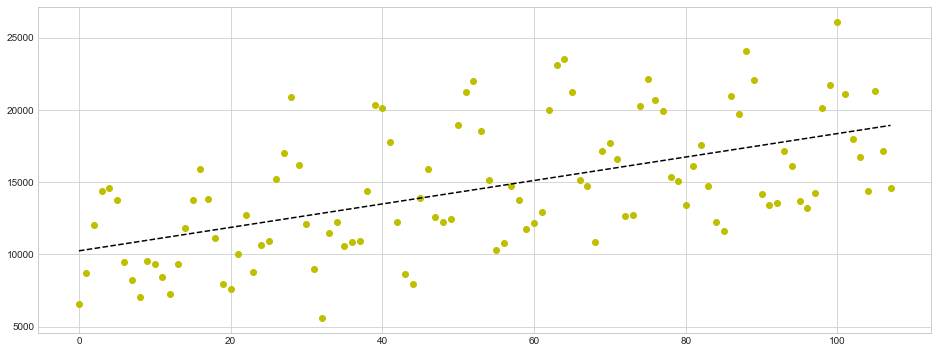

In [9]:
# LS fitting
plt.figure(figsize=(16,6))
fit = np.polyfit(np.arange(df.shape[0]), df.values, 1)
fit_fn = np.poly1d(fit.squeeze())
plt.plot(np.arange(df.shape[0]), df, 'yo', 
         np.arange(df.shape[0]), fit_fn(np.arange(df.shape[0])), '--k')
plt.show()

In [10]:
trend = fit_fn(np.arange(df.shape[0]))

df_detrend = df - trend.reshape(-1,1)

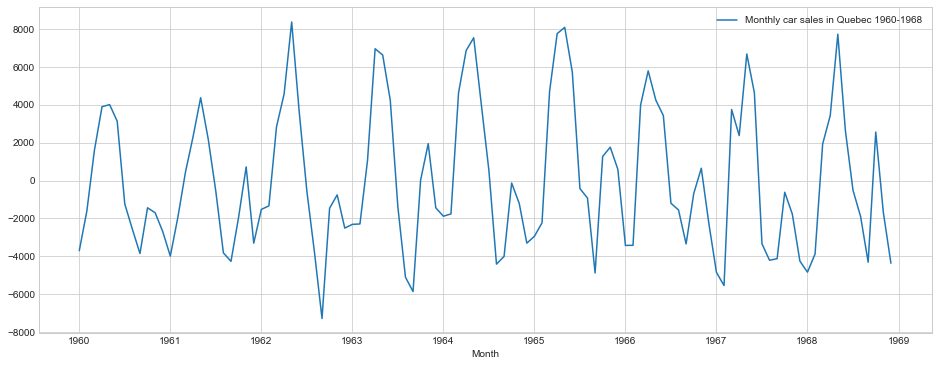

In [11]:
# detrended plot
df_detrend.plot(figsize=(16,6))
plt.show()

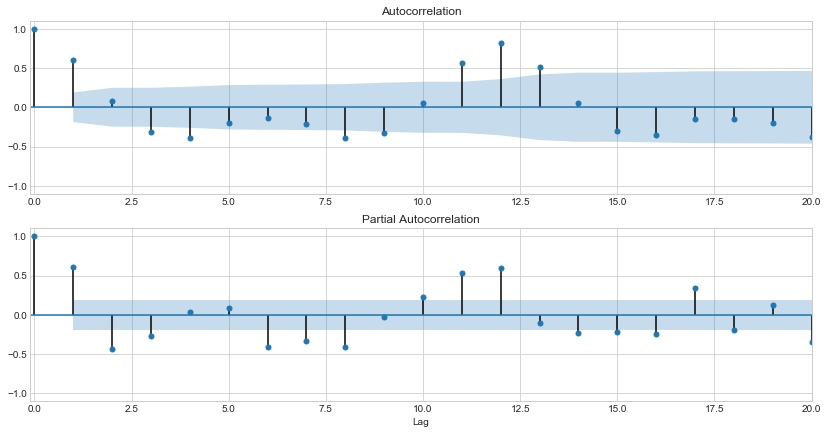

In [12]:
# ACF, PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))

sm.graphics.plot_acf(df_detrend, lags=40, ax=ax1)
sm.graphics.plot_pacf(df_detrend, lags=40, ax=ax2)

ax1.set_xlim(-0.1,20)
ax1.set_ylim(-1.1,1.1)

ax2.set_xlim(-0.1,20)
ax2.set_ylim(-1.1,1.1)
ax2.set_xlabel("Lag")

plt.show()

# A seasonal component detected

## Modeling - 1. SARIMA

In [13]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

aic = float('inf')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            if results.aic < aic:
                min_aic_par = param
                min_aic_s_par = param_seasonal
                aic = results.aic

                
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2368.129775046669
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2056.3286142733828
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1718.9794268301005
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1508.717702727358


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1719.30507449978
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1702.3459166035796
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1528.4275154012914
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1491.1482370035087
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2270.3221155237525
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1999.7351480198736
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1694.3168382794133


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1482.6034405243672
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1717.6185286501618


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1682.3919585686237
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1517.9699731761477


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1475.4064565733506
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2021.820660579232
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1750.7073455245365
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1717.5488696630823
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1486.6219303619039
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1730.532600678737
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1700.843012234267


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1505.8026981045325
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1486.9245275803678
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2001.995761150066
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1743.1490402194038


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1660.8060512196676


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1436.8942015080297
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1697.1291283685373


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1648.2982380433643
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1474.1822884489115


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1437.9752590187652
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2041.367310336418
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1778.730473633236
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1703.5544539806767
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1489.0042819538755


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1698.3755224326028
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1695.3897786937555


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1486.2908568782639


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1488.0204681231103
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2021.379608658632
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1751.9399602519275
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1678.340866793908


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1456.3487623501337
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1696.6686217549777


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1665.1753749254005
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1473.2409848719074


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1457.0382107146152
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2021.1542944931148
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1750.9341994011352
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1687.2231310254333
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1469.2043424692595


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be 

ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1687.104024469761
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1681.5271203048635


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1470.218717244428


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1471.1958812748574
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1992.2942881730428
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1734.5275285715925
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1662.7631461876026


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1438.6509741279162
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1675.614936927758


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1648.1716453746217


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1456.5303199750092


/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1437.9360708007198


In [14]:
print("min aic: ", aic, ", parameter set {} - {}".format(min_aic_par, min_aic_s_par))

min aic:  1436.8942015080297 , parameter set (0, 1, 1) - (0, 1, 1, 12)


In [15]:
mod = sm.SARIMAX(df_detrend, order=min_aic_par, seasonal_order=min_aic_s_par)
result = mod.fit()

/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


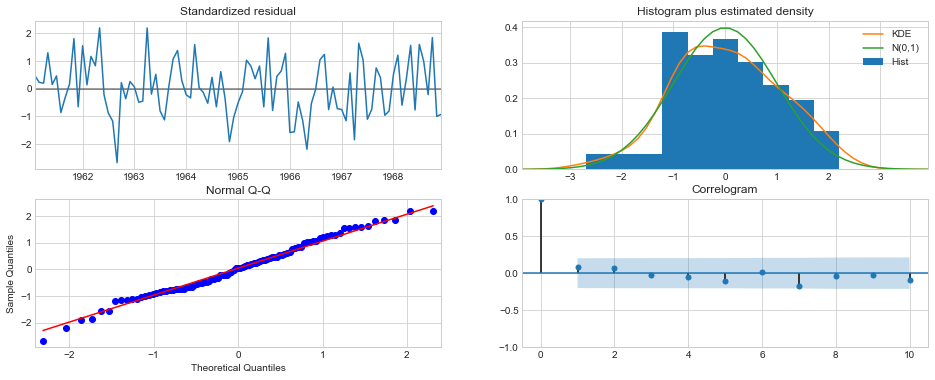

In [75]:
# See the residual is stationary
plt.rcParams['figure.figsize'] = 16, 6
result.plot_diagnostics()
plt.show()

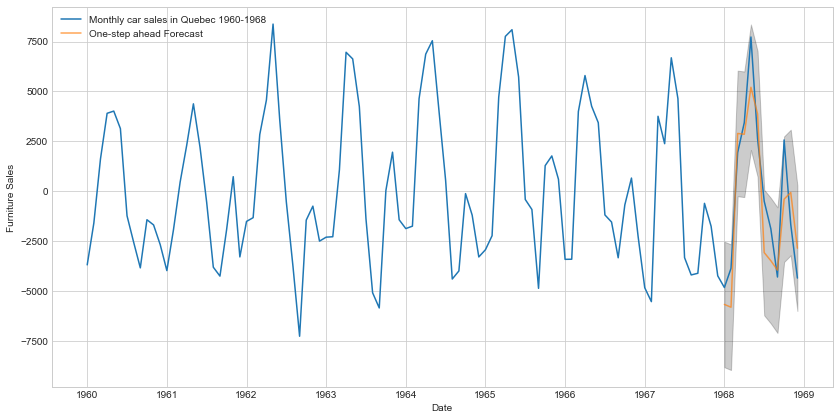

In [90]:
# Pred
df_detrend.index = pd.to_datetime(df_detrend.index)

pred = result.get_prediction(start=pd.to_datetime('1968-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_detrend.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

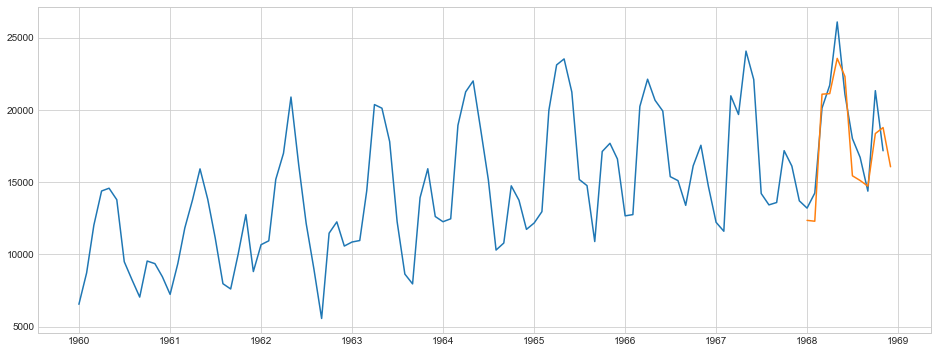

In [100]:
# Trend-added prediction
plt.plot(df)
plt.plot(pred.predicted_mean + trend[-12:])

## Modeling - 2. Machine Learning - Random Forest

### Cross-validation for time series data

- Time series data has a temporal context. That is why its cross-validation requires more careful approaches compared to cross-sectional data.

In [105]:
df_detrend['lag'] = df_detrend.shift()
df_detrend.dropna(inplace=True)

In [131]:
y = df_detrend['lag'].values
X = df_detrend['Monthly car sales in Quebec 1960-1968']

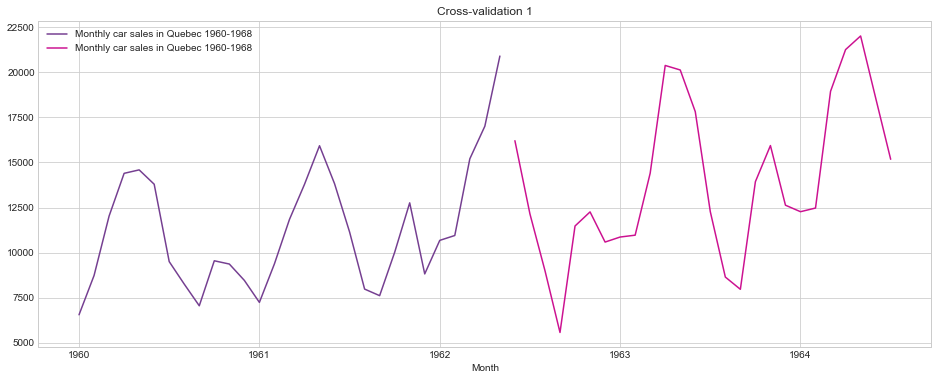

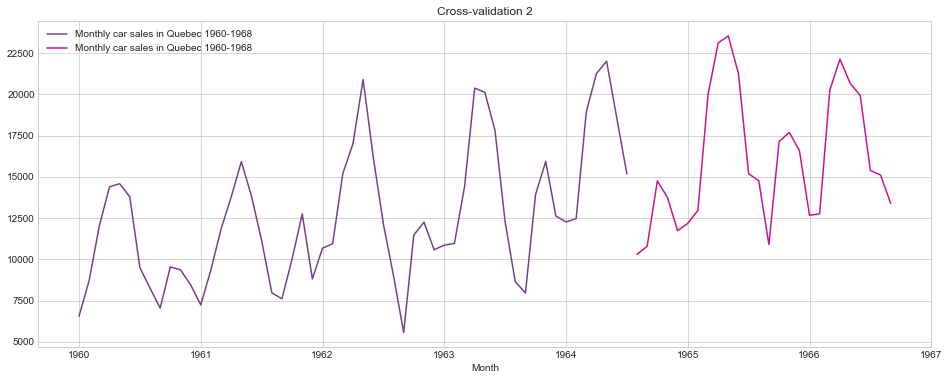

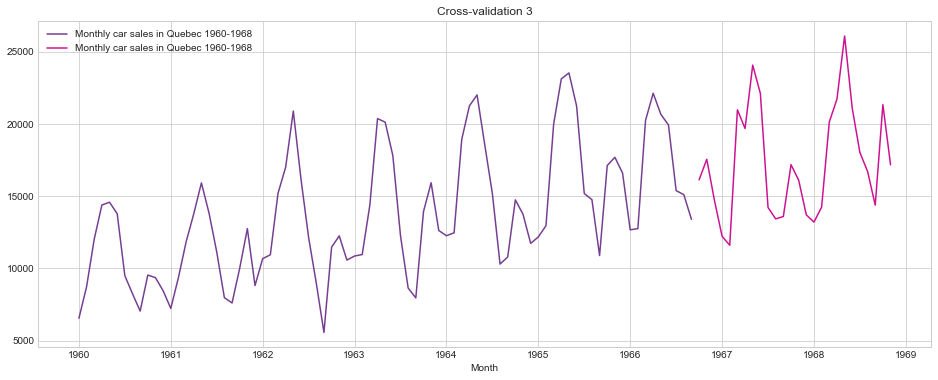

In [135]:
tss = TimeSeriesSplit()

cross_val_num = 1
for train_i, test_i in tss.split(X):
    X_train, X_test = X[train_i], X[test_i]
    y_train, y_test = y[train_i], y[test_i]
    
    fig, ax = plt.subplots(1, figsize=(16, 6))
    
    plt.title('Cross-validation {}'.format(cross_val_num))
    df.iloc[train_i,:].plot(ax=ax, color="#753F91")
    df.iloc[test_i,:].plot(ax=ax, color="#CC1291")
    cross_val_num += 1 
    plt.show()

### As I am taking an interview in a limited amount of time... I will use one hold-out test set for my model evaluation.

In [145]:
y_train

array([-3700.77726809, -1603.97976983,  1612.81772843,  3900.61522669,
        4011.41272495,  3134.21022321, -1239.99227853, -2568.19478026,
       -3851.397282  , -1436.59978374, -1698.80228548, -2688.00478722,
       -3988.20728896, -1932.4097907 ,   449.38770757,  2315.18520583,
        4375.98270409,  2189.78020235,  -569.42229939, -3818.62480113,
       -4264.82730287, -1941.02980461,   721.76769366, -3302.43480808,
       -1522.63730982, -1333.83981156,  2837.9576867 ,  4566.75518496,
        8375.55268322,  3599.35018149,  -543.85232025, -3771.05482199,
       -7281.25732373, -1456.45982547,  -755.66232721, -2509.86482895,
       -2312.06733068, -2290.26983242,  1068.52766584,  6961.3251641 ,
        6629.12266236,  4235.92016062, -1393.28234112, -5100.48484286,
       -5861.68734459,    27.11015367,  1949.90765193, -1439.29484981,
       -1881.49735155, -1759.69985329,  4633.09764497,  6866.89514324,
        7541.6926415 ,  4026.49013976,   539.28763802, -4410.91486372,
      

In [146]:
X_train, X_test = list(map(lambda x: x.values.reshape(-1,1), [X_train, X_test]))

In [147]:
y_train, y_test = list(map(lambda x: x.reshape(-1,1), [y_train, y_test]))

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

def metric(clf, X_train, y_train, X_test, y_test, mae, msq):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    metric_mae = mae(y_test, pred)
    metric_msq = msq(y_test, pred)
    
    return pred, metric_mae, metric_msq

In [122]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 100).astype(int),
    'max_depth': [None] + list(np.linspace(5, 30).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
rf = RandomForestRegressor()

# Create the random search model
rs = RandomizedSearchCV(rf, param_grid, n_jobs = -1, 
                        scoring = 'neg_mean_absolute_error', cv = 3, 
                        n_iter = 100, verbose = 1)

In [148]:
rs.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': array([ 10,  11,  13,  15,  17,  19,  21,  22,  24,  26,  28,  30,  32,
        33,  35,  37,  39,  41,  43,  44,  46,  48,  50,  52,  54,  55,
        57,  59,  61,  63,  65,  66,  68,  70,  72,  74,  76,  77,  79,
        81,  83,  85,  87,  88,  90,  92,  94, ...9, 49, 49, 49, 49, 49, 49, 49, 49, 50], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, 

In [158]:
cvres = rs.cv_results_
for acc, params in zip(cvres['mean_test_score'], cvres['params']):
    print("test accuracy: {},".format(acc), "parameters: ", params)  

test accuracy: -2176.9354547646417, parameters:  {'n_estimators': 13, 'min_samples_split': 10, 'max_leaf_nodes': 39, 'max_features': 0.7, 'max_depth': 15, 'bootstrap': True}
test accuracy: -2235.1367826773926, parameters:  {'n_estimators': 19, 'min_samples_split': 5, 'max_leaf_nodes': 23, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
test accuracy: -2485.846654333572, parameters:  {'n_estimators': 19, 'min_samples_split': 5, 'max_leaf_nodes': 49, 'max_features': None, 'max_depth': 17, 'bootstrap': False}
test accuracy: -2403.9658523386206, parameters:  {'n_estimators': 79, 'min_samples_split': 2, 'max_leaf_nodes': 30, 'max_features': 0.8999999999999999, 'max_depth': 7, 'bootstrap': False}
test accuracy: -2221.960616369719, parameters:  {'n_estimators': 30, 'min_samples_split': 10, 'max_leaf_nodes': 17, 'max_features': 0.5, 'max_depth': 18, 'bootstrap': True}
test accuracy: -2462.027146332998, parameters:  {'n_estimators': 92, 'min_samples_split': 5, 'max_leaf_nodes': 47, '

In [159]:
clf = rs.best_estimator_

In [161]:
pred, mae, mse = metric(clf, X_train, y_train, X_test, y_test, mean_absolute_error, mean_squared_error)

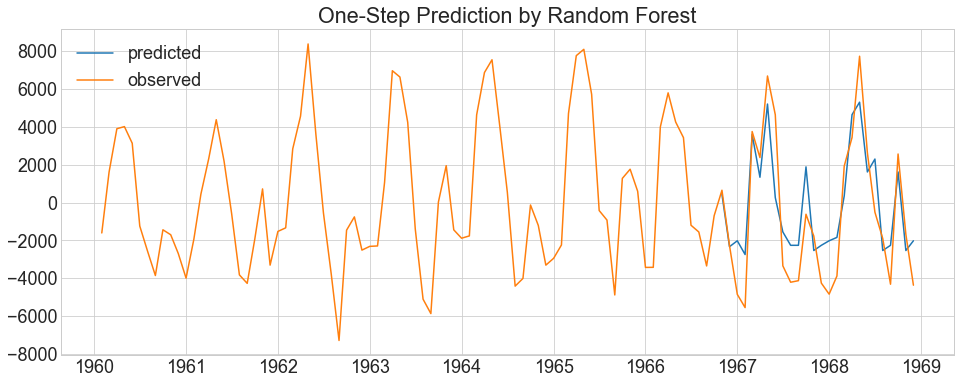

In [184]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(16,6))
plt.title("One-Step Prediction by Random Forest")
plt.plot(df_detrend.index[-len(pred):], pred, label='predicted')
plt.plot(df_detrend['Monthly car sales in Quebec 1960-1968'], label='observed')
plt.legend()
plt.show()

In [183]:
print('metrics - mean absolute error: {}, mean squared error: {}'.format(mae, mse))

metrics - mean absolute error: 3043.5593324887723, mean squared error: 14697723.339357814


## Modeling 3 - Exponential Smoothing

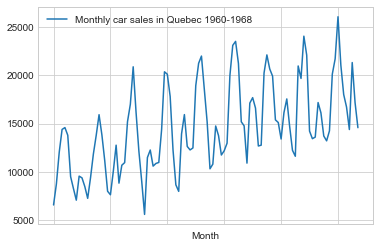

In [8]:
df.plot()

In [6]:
df.dropna(inplace=True)

In [10]:
es = sm.ExponentialSmoothing(df, trend='add', damped=True, seasonal='add', seasonal_periods=12)

/Users/jimmy/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
es.fit()

In [45]:
pred = es.predict(es.params, start='1967-01-01')

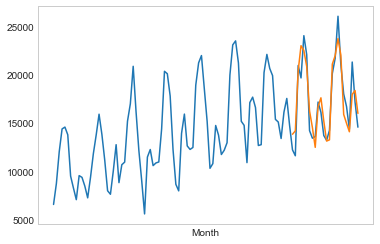

In [56]:
sns.lineplot(df.index, df.values.squeeze())
sns.lineplot(list(df.index[df.index>="1967-00-01"]), pred)
plt.grid(False)
plt.xticks([])
plt.show()


<br>
#### So far, the predictions are pretty close for different algorithms: SARIMA, Exponential Smoothing. I will compare the difference between them more deeply in the next project.

